# Analisis de datos de un data set de "Credit Card Approval"



integrantes
Javier Briones
Gabriel Gonzalez
Luis Rodriguez

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 1. Comprensión de los datos

Aquí se leerá el dataset.

In [2]:
CC_data = pd.read_csv("default of credit card clients.csv")


Se generará estadísticas descriptivas del dataset.

In [3]:
CC_data.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
#se elimino la variable ID que no tiene importancia
CC_data=CC_data.drop(['ID'], axis = 1)


In [5]:
CC_data.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Se comprueba que los datos no presenten si hay valores nulos y los suma.

In [6]:
CC_data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## 2. Descripción y distribución de los datos

Se mostrará como están agrupado los datos en cada grupo.Se eligieron ciertas variables para la representacion que prematuramente se supuso que podrian representar mejor este modelo de datos

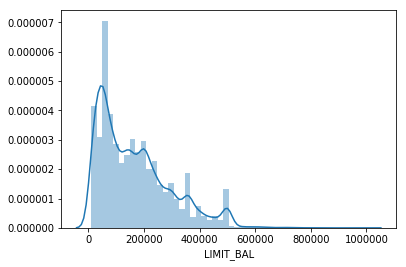

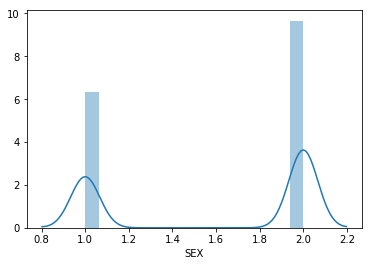

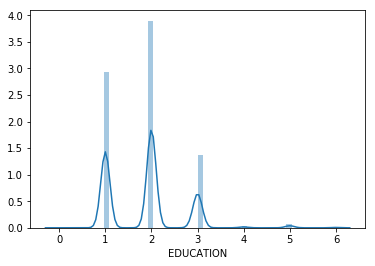

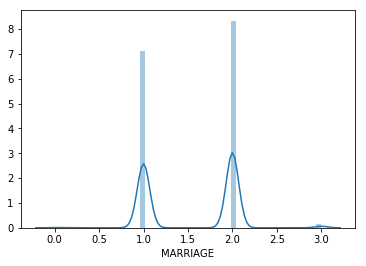

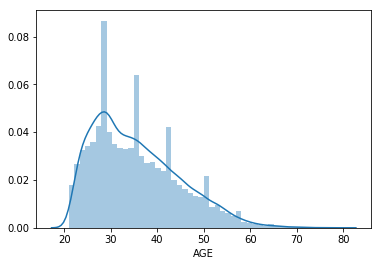

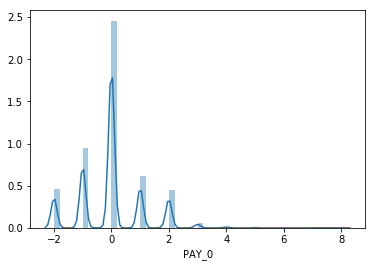

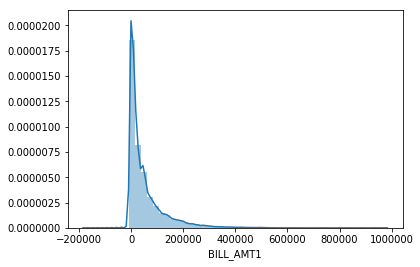

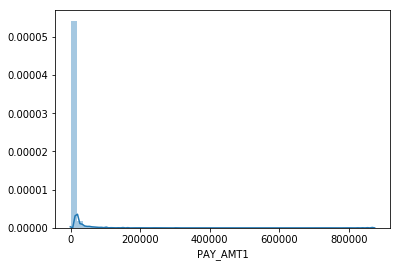

In [7]:
def plotDistPlot(col):
    sns.distplot(col)
    plt.show()
plotDistPlot(CC_data['LIMIT_BAL'])       
plotDistPlot(CC_data['SEX'])                           
plotDistPlot(CC_data['EDUCATION'])                    
plotDistPlot(CC_data['MARRIAGE'])                     
plotDistPlot(CC_data['AGE'])                         
plotDistPlot(CC_data['PAY_0'])                        
#plotDistPlot(CC_data['PAY_2'])                    
#plotDistPlot(CC_data['PAY_3'])                   
#plotDistPlot(CC_data['PAY_4'])                
#plotDistPlot(CC_data['PAY_5'])            
#plotDistPlot(CC_data['PAY_6'])         
plotDistPlot(CC_data['BILL_AMT1'])       
#plotDistPlot(CC_data['BILL_AMT2'])    
#plotDistPlot(CC_data['BILL_AMT3'])
#plotDistPlot(CC_data['BILL_AMT4'])
#plotDistPlot(CC_data['BILL_AMT5'])
#plotDistPlot(CC_data['BILL_AMT6'])
plotDistPlot(CC_data['PAY_AMT1'])
#plotDistPlot(CC_data['PAY_AMT2'])
#plotDistPlot(CC_data['PAY_AMT3'])
#plotDistPlot(CC_data['PAY_AMT4'])
#plotDistPlot(CC_data['PAY_AMT5'])
#plotDistPlot(CC_data['default payment next month'])


## Matriz de correlación de las variables(Correlacion de pearson).

Donde los datos que son mas cercano a 1 son directamente proporcional y los mas cercanos a -1 son inversamente proporcional. 

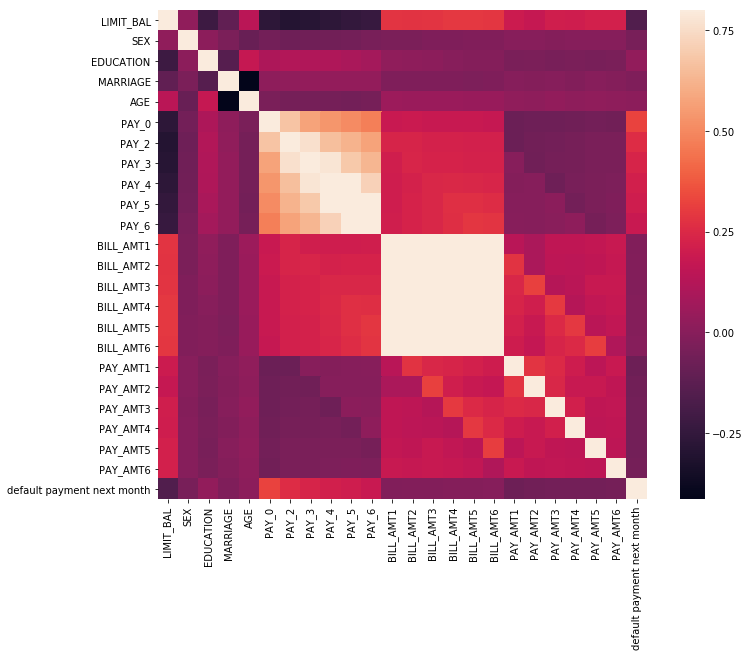

In [8]:

corrmat = CC_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Grafica de Dispersion de las variables.
Aqui se muestra la grafica que creimos que eran mas representativas para mostrar los datos 



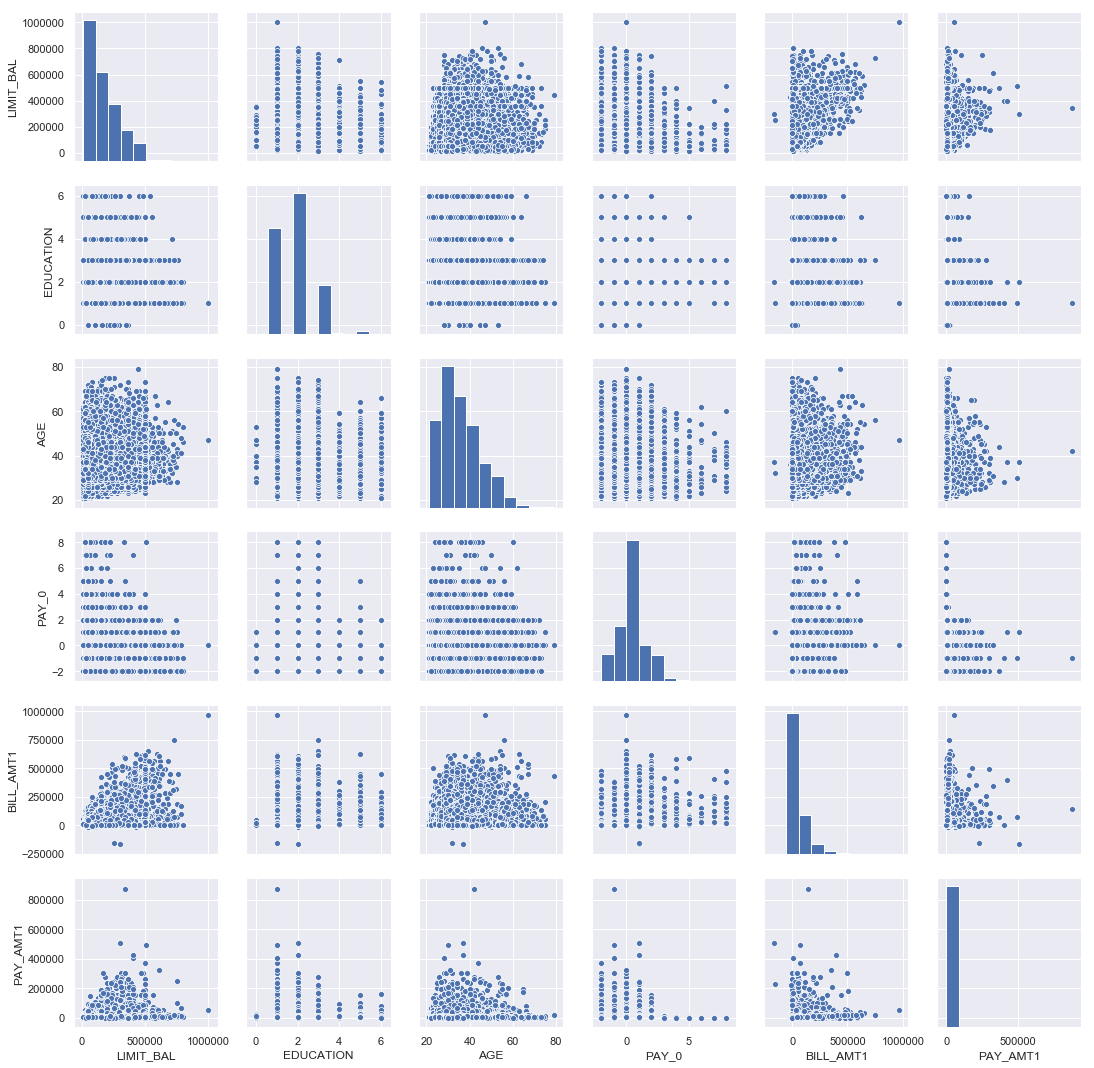

In [9]:
sns.set()
cols = ['LIMIT_BAL',
        #'SEX',
        'EDUCATION',
        #'MARRIAGE',
        'AGE',
        'PAY_0',
        #'PAY_2',
        #'PAY_3',
        #'PAY_4',
        #'PAY_5',          
        #'PAY_6',         
        'BILL_AMT1',       
        #'BILL_AMT2',   
        #'BILL_AMT3',
        #'BILL_AMT4',
        #'BILL_AMT5',
        #'BILL_AMT6',
        'PAY_AMT1',
        #'PAY_AMT2',
        #'PAY_AMT3',
        #'PAY_AMT4',
        #'PAY_AMT5',
        #'PAY_AMT6',
        #'default payment next month'
]
sns.pairplot(CC_data[cols], size = 2.5 )
plt.show();

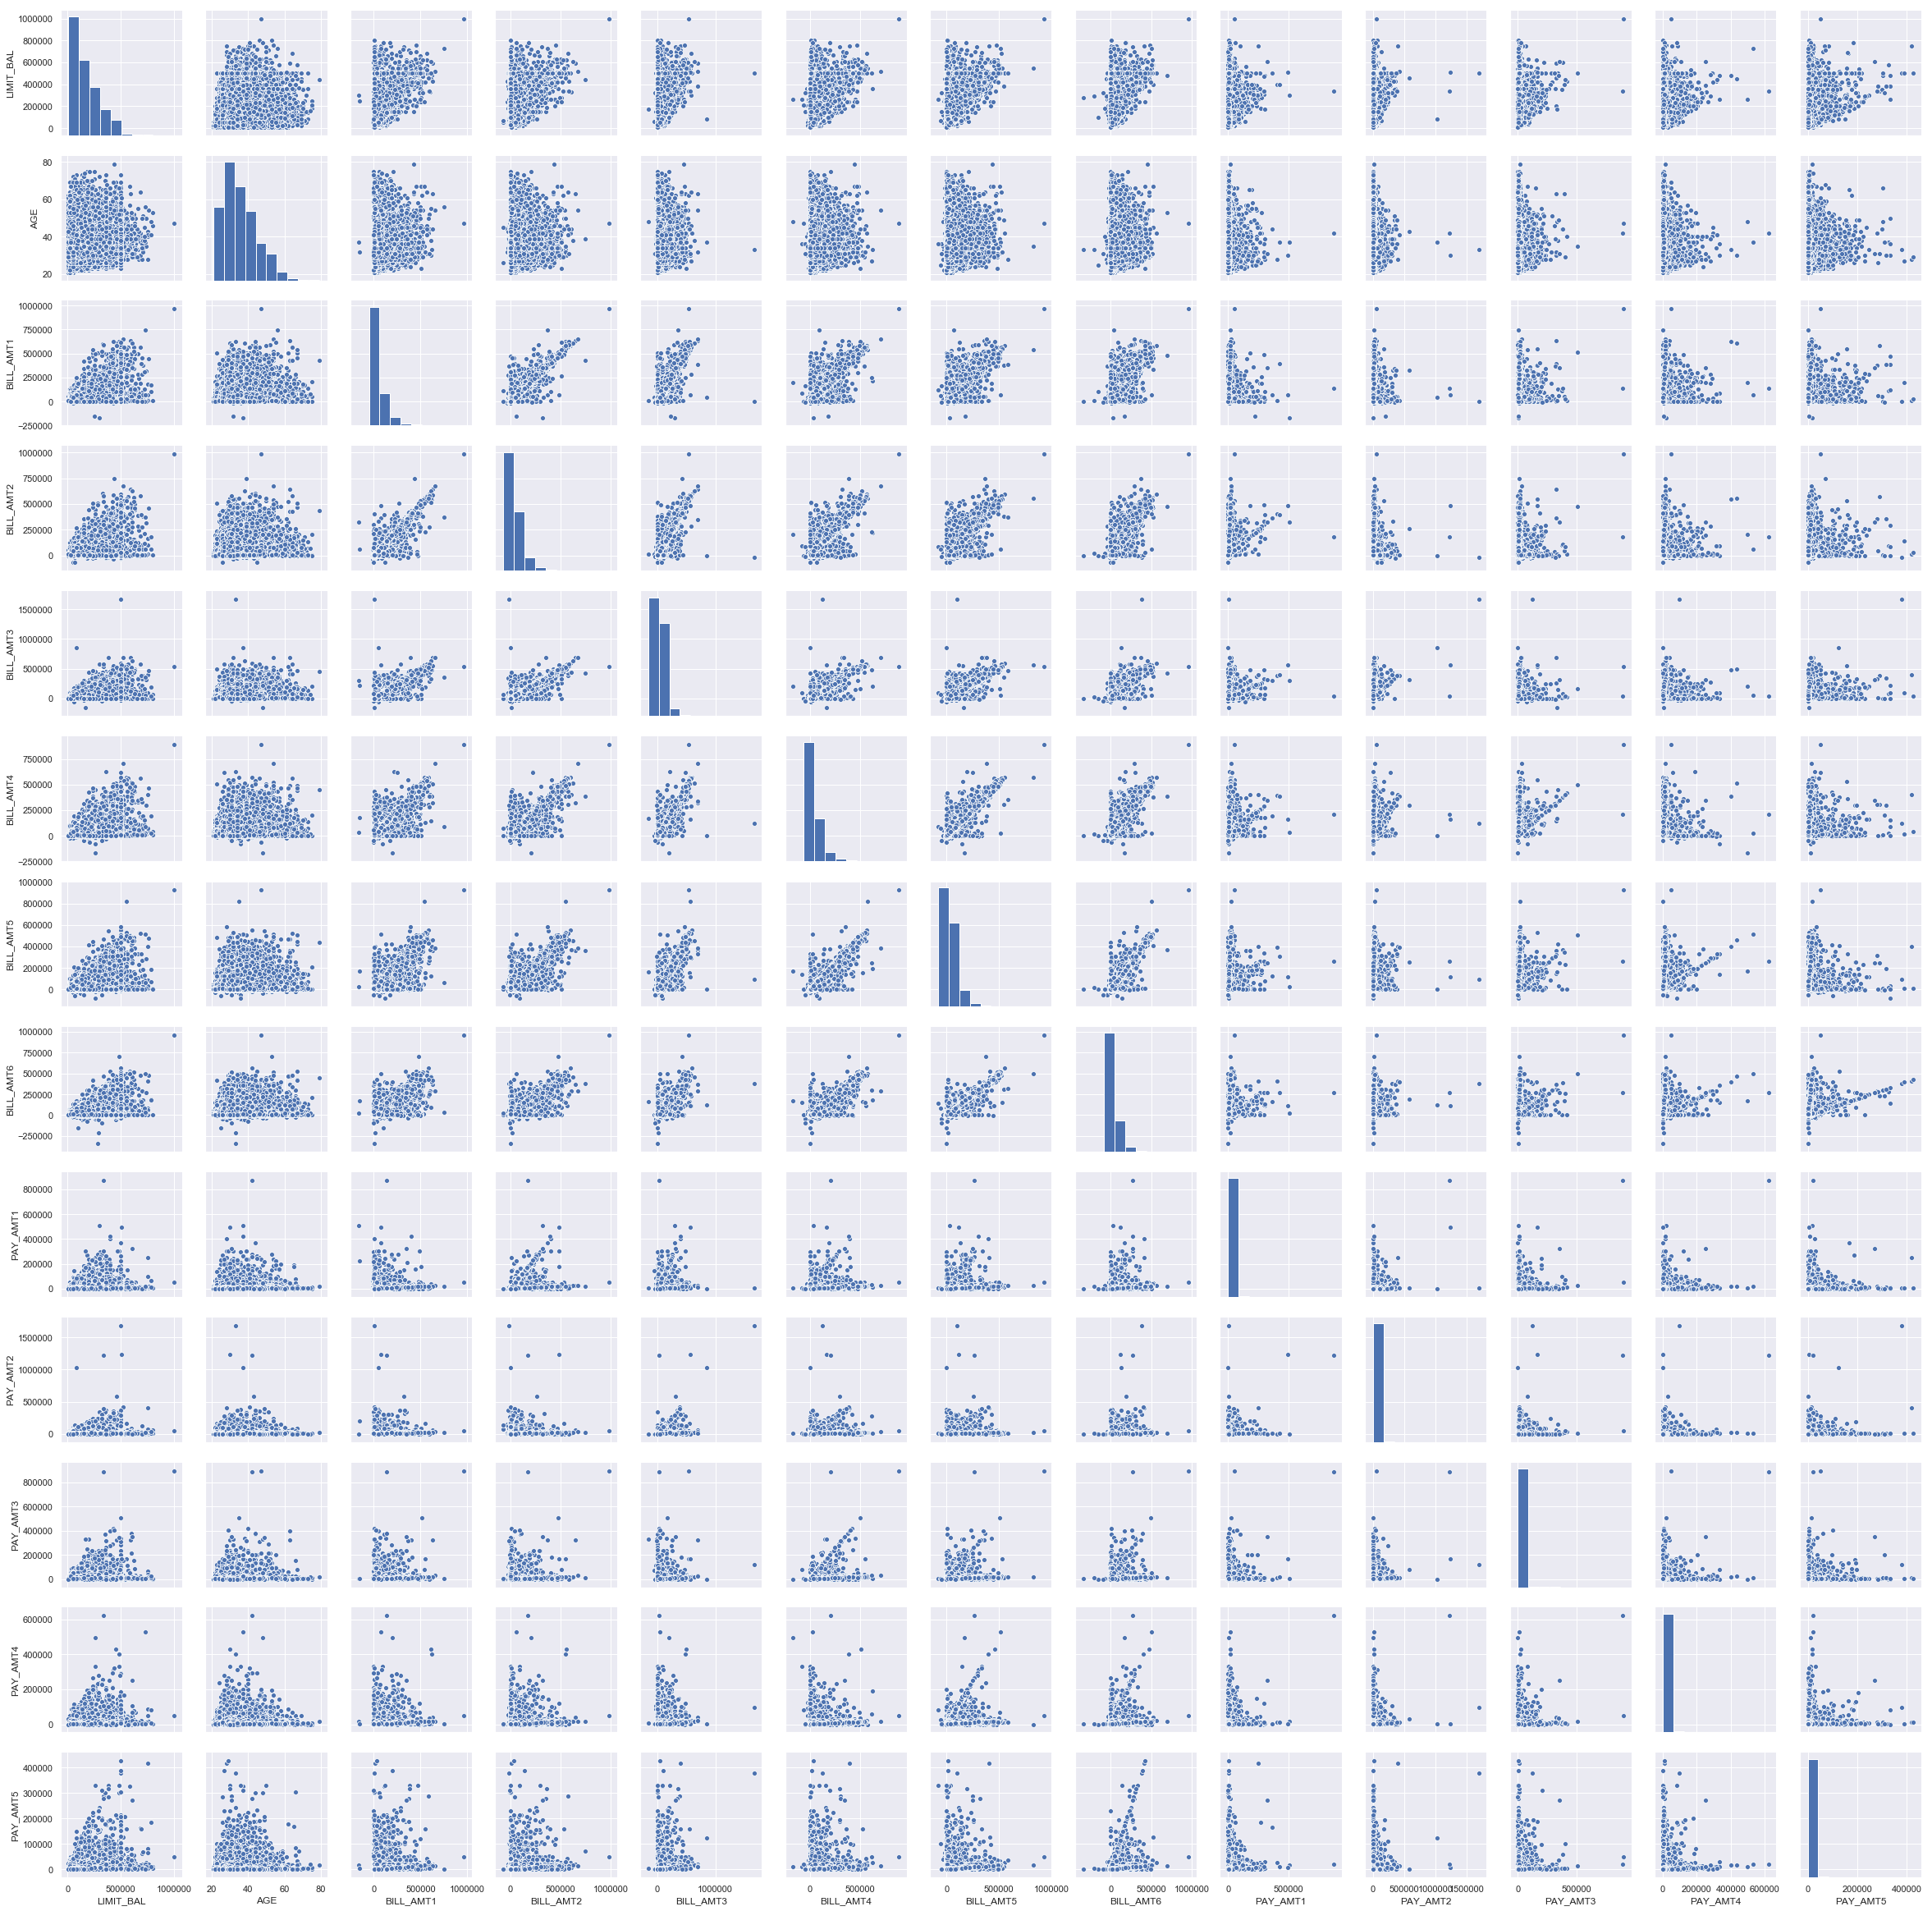

In [10]:
sns.set()
cols = ['LIMIT_BAL',
        'AGE',      
        'BILL_AMT1',       
        'BILL_AMT2',   
        'BILL_AMT3',
        'BILL_AMT4',
        'BILL_AMT5',
        'BILL_AMT6',
        'PAY_AMT1',
        'PAY_AMT2',
        'PAY_AMT3',
        'PAY_AMT4',
        'PAY_AMT5',
]
sns.pairplot(CC_data[cols], size = 2.5 )
plt.show();

Se muestra el recuento de los que pagaron (1) y los que no pagaron (0) .

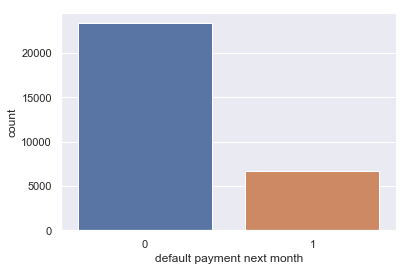

In [11]:
sns.countplot(data = CC_data, x = 'default payment next month')

In [12]:
print("shape of the data:", CC_data.shape)

shape of the data: (30000, 24)


In [13]:
CC_data.tail(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29985,240000,1,1,2,30,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29986,360000,1,1,2,35,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29987,130000,1,1,2,34,0,0,0,0,0,...,108047,93708,97353,3000,2000,93000,4000,5027,4005,0
29988,250000,1,1,1,34,0,0,0,0,0,...,245750,175005,179687,65000,8800,9011,6000,7000,6009,0
29989,150000,1,1,2,35,-1,-1,-1,-1,-1,...,780,0,0,9054,0,783,0,0,0,0
29990,140000,1,2,1,41,0,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29991,210000,1,2,1,34,3,2,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29992,10000,1,3,1,43,0,0,0,-2,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,100000,1,1,2,38,0,-1,-1,0,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29994,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1


In [14]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

## 4. Modelado y evaluación de datos

se le pasan los datos a los datos a X e y

In [15]:
X = CC_data.iloc[:,[0,1,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values
y = CC_data.iloc[:,23].values

In [16]:
print("\n se reviso los datos en X: \n", X ,"\n se comprobo la dimension:\n",X.shape)
print("-"*50)
print("\n se reviso los datos en X: \n", y ,"\n se comprobo la dimension: ",y.shape)


 se reviso los datos en X: 
 [[ 20000      2      1 ...      0      0      0]
 [120000      2      2 ...   1000      0   2000]
 [ 90000      2      2 ...   1000   1000   5000]
 ...
 [ 30000      1      2 ...   4200   2000   3100]
 [ 80000      1      1 ...   1926  52964   1804]
 [ 50000      1      1 ...   1000   1000   1000]] 
 se comprobo la dimension:
 (30000, 21)
--------------------------------------------------

 se reviso los datos en X: 
 [1 1 0 ... 1 1 1] 
 se comprobo la dimension:  (30000,)


# Dividir el data set en conjunto de entrenamiento y en conjunto de testing

In [17]:

# Dividir el data set en conjunto de entrenamiento y en conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)



# Escalado de variables

In [18]:
# Escalado de variables
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# aqui comprobamos los datos

In [19]:
print("X entrenamiento\n",X_train)
print("X testeo\n",X_test)
print("Y entrenamiento\n",y_train)
print("Y testeo\n",y_test)

X entrenamiento
 [[-1.14095868  0.81451348 -1.06119761 ... -0.24739232 -0.3163186
  -0.296449  ]
 [ 0.71261375  0.81451348  0.85735174 ... -0.29047404 -0.30543928
  -0.27980761]
 [-1.14095868 -1.22772676 -1.06119761 ... -0.26676941 -0.21873439
  -0.296449  ]
 ...
 [-0.29140465  0.81451348 -1.06119761 ... -0.04716245 -0.3163186
  -0.0124662 ]
 [-0.90926213  0.81451348 -1.06119761 ... -0.24739232 -0.25038332
  -0.26805072]
 [-0.21417247  0.81451348  0.85735174 ... -0.18280204 -0.17126099
  -0.18285588]]
X testeo
 [[-1.14095868 -1.22772676  0.85735174 ... -0.20863815 -0.3163186
  -0.25987201]
 [-1.14095868  0.81451348  0.85735174 ... -0.3119826  -0.25038332
  -0.296449  ]
 [ 0.48091719  0.81451348 -1.06119761 ... -0.3119826  -0.3163186
  -0.296449  ]
 ...
 [-0.67756558 -1.22772676 -1.06119761 ... -0.21509718 -0.30721953
  -0.293098  ]
 [-1.14095868 -1.22772676  0.85735174 ... -0.3119826  -0.18444804
  -0.296449  ]
 [-0.90926213 -1.22772676  0.85735174 ...  0.02840818 -0.13077673
  -0.1210

se comprobo las dimensiones 

In [20]:
print("X_train:",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train:",y_train.shape)
print("y_test: ",y_test.shape)

X_train: (24000, 21)
X_test:  (6000, 21)
y_train: (24000,)
y_test:  (6000,)


# Ajustar el clasificador en el Conjunto de Entrenamiento

In [21]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

# Aplicar k-fold cross validation

### kfold =10


In [22]:
# Aplicar k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

## metricas del cross validation

In [23]:
print("10" ,"validaciones con cross validation fueron las siguientes \n",accuracies)

10 validaciones con cross validation fueron las siguientes 
 [0.81174511 0.82083333 0.82625    0.82625    0.81916667 0.81166667
 0.81583333 0.81416667 0.81333333 0.81867445]


In [24]:
print("el promedio fue de: ",accuracies.mean())
print("la desviacion estandar fue de: ",accuracies.std())

el promedio fue de:  0.8177919553892284
la desviacion estandar fue de:  0.005156912032652951


# Random Forest con estimador 5 

In [25]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 5, criterion = "entropy", random_state = 0)
classifier = RandomForestClassifier(n_estimators = 5,  random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

El Random Forest Classifier tiene una precisión de:  0.7975


# comparativa con los estimadores

In [27]:
'''#con todos los datos desde el 5 hasta el estimador 50
wcss = []
for i in range(5, 51):
    classifier = RandomForestClassifier(n_estimators = i,  random_state = 0)
    classifier.fit(X_train, y_train)
    wcss.append(classifier.score(X_test, y_test))
'''


'#con todos los datos desde el 5 hasta el estimador 50\nwcss = []\nfor i in range(5, 51):\n    classifier = RandomForestClassifier(n_estimators = i,  random_state = 0)\n    classifier.fit(X_train, y_train)\n    wcss.append(classifier.score(X_test, y_test))\n'

In [28]:
'''#ploteo de todo los datos
plt.plot(range(5,51), wcss)
plt.title("comparativa de los estimadores")
plt.xlabel("Número de Estimador")
plt.ylabel("precision")
plt.show()'''

'#ploteo de todo los datos\nplt.plot(range(5,51), wcss)\nplt.title("comparativa de los estimadores")\nplt.xlabel("Número de Estimador")\nplt.ylabel("precision")\nplt.show()'

In [29]:
# con los datos de 5 en 5 hasta el estimador 50
wcss = []
for i in range(5, 55,5):
    classifier = RandomForestClassifier(n_estimators = i,  random_state = 0)
    classifier.fit(X_train, y_train)
    wcss.append(classifier.score(X_test, y_test))

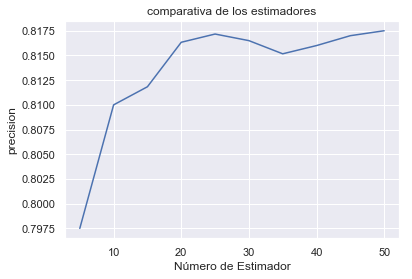

In [30]:
plt.plot(range(5,55,5), wcss)
plt.title("comparativa de los estimadores")
plt.xlabel("Número de Estimador")
plt.ylabel("precision")
plt.show()


In [31]:
print("El Random Forest Classifier\n")

for i in range(len(wcss)):
    print("Estimador:",(i+1)*5,"precision:",wcss[i],)
   # if i == 0:
    #    print("Estimador: 5 ","precision:",wcss[i])
    #else:
    #    print("Estimador:",(i+1)*5,"precision:",wcss[i],)
    

El Random Forest Classifier

Estimador: 5 precision: 0.7975
Estimador: 10 precision: 0.81
Estimador: 15 precision: 0.8118333333333333
Estimador: 20 precision: 0.8163333333333334
Estimador: 25 precision: 0.8171666666666667
Estimador: 30 precision: 0.8165
Estimador: 35 precision: 0.8151666666666667
Estimador: 40 precision: 0.816
Estimador: 45 precision: 0.817
Estimador: 50 precision: 0.8175


# Predicción de los resultados con el Conjunto de Testing

In [32]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


# Elaborar una matriz de confusión

In [33]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[4437  266]
 [ 829  468]]


como podemos ver nuestro modelo predijo el 4875(4443+432) son correctas y los resultados erroneos fueron de 1125(865+260) con la matriz de confusion

Feature ranking:
1. feature 3  (0.098182)
2. feature 9  (0.069060)
3. feature 0  (0.067840)
4. feature 10  (0.059284)
5. feature 11  (0.057265)
6. feature 14  (0.056701)
7. feature 13  (0.056456)
8. feature 15  (0.055941)
9. feature 12  (0.055684)
10. feature 20  (0.053605)
11. feature 16  (0.053505)
12. feature 4  (0.051243)
13. feature 17  (0.050680)
14. feature 19  (0.048577)
15. feature 18  (0.047842)
16. feature 7  (0.024948)
17. feature 6  (0.024521)
18. feature 5  (0.019558)
19. feature 8  (0.018387)
20. feature 2  (0.016837)
21. feature 1  (0.013886)


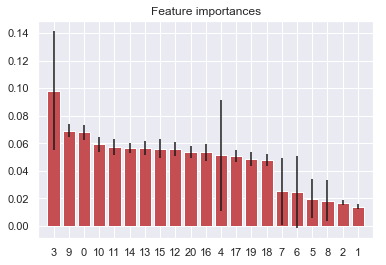

In [34]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print el ranking de los features
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d  (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotea la importancia de los feature en el forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# parte de k-mean

In [35]:
'''
se crea una copia del la data para el modelo de k-mean por que se ve que ahi que modificar los datos por que kmean no trabaja 
muy bien con los datos categoricos por eso en este data set sacan esos datos que afectan los resultados
'''
data_kmean = CC_data.copy()




In [36]:
data_kmean=data_kmean.drop(['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5', 'PAY_6'], axis = 1)

In [37]:
data_kmean.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [38]:
X = np.array(data_kmean[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])
y = np.array(data_kmean['default payment next month'])
X.shape



(30000, 14)

In [39]:
X_train_kmean, X_test_kmean, y_train_kmean, y_test_kmean = train_test_split(X, y,test_size = 0.2, random_state = 0)

# revisar 

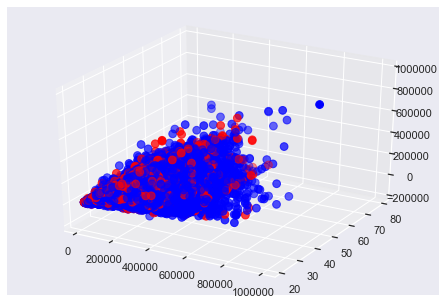

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0],
           X[:, 1], 
           X[:, 2], 
           X[:, 3], 
#          X[:, 4],
#          X[:, 5],
#          X[:, 6], 
#           X[:, 7],
#           X[:, 8], 
#           X[:, 9], 
#           X[:, 10], 
#           X[:, 11], 
#           X[:, 12], 
#           X[:, 13],
           c=asignar,s = 60)

sc_X = StandardScaler()
X_train_kmean = sc_X.fit_transform(X_train)

X_train_kmean

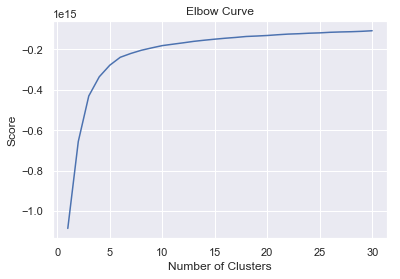

In [41]:
from sklearn.cluster import KMeans
Nc = range(1, 31)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train_kmean).score(X_train_kmean) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=5).fit(X_train_kmean)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.95029371e+05 3.58584615e+01 1.35220105e+05 1.32497735e+05
  1.26421258e+05 1.15934080e+05 1.08542225e+05 1.04380883e+05
  1.03914747e+04 9.44531273e+03 8.40767133e+03 7.85217818e+03
  7.06214294e+03 7.49450294e+03]
 [4.07203579e+05 3.76282625e+01 2.64961301e+04 2.34453039e+04
  2.34004452e+04 2.30538710e+04 2.24616197e+04 2.24834966e+04
  9.09098881e+03 1.05229523e+04 9.57387770e+03 9.18636913e+03
  9.54275690e+03 1.16248251e+04]
 [3.73924004e+05 3.84282536e+01 2.97521476e+05 2.91476782e+05
  2.87973798e+05 2.65138673e+05 2.45872624e+05 2.33631744e+05
  1.88431557e+04 2.40567030e+04 1.70590890e+04 1.42252280e+04
  1.57498031e+04 1.67635662e+04]
 [2.10185619e+05 3.59188963e+01 1.37370227e+04 1.14823109e+04
  1.07664478e+04 1.03980742e+04 1.03722759e+04 1.02468062e+04
  4.20556722e+03 4.51706572e+03 4.44066020e+03 4.32819699e+03
  4.24639365e+03 4.66461773e+03]
 [5.91979013e+04 3.42943667e+01 3.03204036e+04 2.90788645e+04
  2.70723190e+04 2.40587234e+04 2.18541983e+04 2.11049386e+04


In [45]:
type(d)

numpy.ndarray

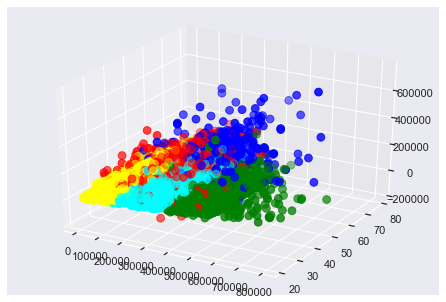

In [46]:
from mpl_toolkits.mplot3d import Axes3D

labels = kmeans.predict(X_train_kmean)
# Getting the cluster centers
#C = kmeans.cluster_centers_
C = centroids
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_kmean[:, 0], X_train_kmean[:, 1], X_train_kmean[:, 2],  c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [44]:
copy =  pd.DataFrame()
copy['ID']=X_train_kmean['ID'].values
copy['default payment next month']=labels['default payment next month'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
labels
X_train_kmean


In [ ]:
'''copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo
'''

In [ ]:
'''# Método del codo para averiguar el número óptimo de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,31), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()'''

In [ ]:
# Aplicar el método de k-means para segmentar el data set
kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_kmean)

In [ ]:
#print(y_kmeans.shape)

y_kmeans = kmeans.fit_predict(X_train_kmean)

for elemento in np.nditer(y_kmeans):
    print(elemento)

In [ ]:
# Visualización de los clusters
plt.scatter(X_train_kmean[y_kmeans == 0, 0], X_train_kmean[y_kmeans == 0, 1], s = 100, c = "red", label = "A")
plt.scatter(X_train_kmean[y_kmeans == 1, 0], X_train_kmean[y_kmeans == 1, 1], s = 100, c = "blue", label = "B")
plt.scatter(X_train_kmean[y_kmeans == 2, 0], X_train_kmean[y_kmeans == 2, 1], s = 100, c = "green", label = "C")
plt.scatter(X_train_kmean[y_kmeans == 3, 0], X_train_kmean[y_kmeans == 3, 1], s = 100, c = "cyan", label = "D")
plt.scatter(X_train_kmean[y_kmeans == 4, 0], X_train_kmean[y_kmeans == 4, 1], s = 100, c = "magenta", label = "E")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = "yellow", label = "Baricentros")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de pago (1-100)")
plt.legend()

In [ ]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=5 ,random_state=0)
for train, test in kf.split(X[0]):
    print("%s %s" % (train, test))